# NLP Explore Exercises

<hr style="border:2px solid gray">

1. Spam Data
- a. Load the spam data set.
- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- c. Is there any overlap in the bigrams for the spam data and the ham data?
- d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [1]:
#standard ds imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#nlp imports
import nltk
import unicodedata
import re
from wordcloud import WordCloud

#custom files
import acquire
import prepare
from env import get_connection

<hr style="border:1px solid black">
<hr style="border:1px solid black">

### 1a. Load the spam data set.

In [2]:
#Load spam dataset

#Get SQL database url
url = get_connection('spam_db')

#Define SQL query
query = '''
        SELECT *
        FROM spam
        '''

df = pd.read_sql(query, url, index_col='id')

df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
def clean(text):
    '''
    This function is a simplified text cleaning function
    '''
    text = prepare.basic_clean(text)
    text = prepare.lemmatize(text)
    text = prepare.remove_stopwords(text)
    
    return list(text.split(' '))

In [4]:
#real texts
ham_words = clean(' '.join(df[df.label == 'ham'].text))

#spam messages
spam_words = clean(' '.join(df[df.label == 'spam'].text))

#all messages
all_words = clean(' '.join(df.text))

In [5]:
#create a series with words split and value counts for each word
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [6]:
#combine all frequency into single Series
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

#word count for each text type
word_counts.columns = ['ham', 'spam', 'all']

#take a look
word_counts.head()

,ham,spam,all
u,1041,155,1196
i'm,372,8,380
get,314,83,397
2,305,173,478
ltgt,276,0,276


In [7]:
#take a look at the top ten overall most used words
word_counts['all'].sort_values(ascending=False).head(10)

u       1196
call     600
2        478
get      397
ur       384
i'm      380
go       304
4        287
ltgt     276
free     275
Name: all, dtype: int64

In [8]:
#take a look at the top ten most used ham words
word_counts['ham'].sort_values(ascending=False).head(10)

u       1041
i'm      372
get      314
2        305
ltgt     276
go       273
ok       267
come     242
call     241
know     241
Name: ham, dtype: int64

In [9]:
#take a look at the top ten most used spam words
word_counts['spam'].sort_values(ascending=False).head(10)

call      359
free      216
2         173
u         155
txt       150
ur        144
text      137
mobile    135
4         119
claim     115
Name: spam, dtype: int64

<hr style="border:1px solid black">

### 1b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [10]:
#put list of two word combos together
list(nltk.bigrams(ham_words))

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'u'),
 ('u', 'oni'),
 ('oni', 'u'),
 ('u', 'dun'),
 ('dun', 'say'),
 ('say', 'early'),
 ('early', 'hor'),
 ('hor', 'u'),
 ('u', 'c'),
 ('c', 'already'),
 ('already', 'say'),
 ('say', 'nah'),
 ('nah', 'think'),
 ('think', 'go'),
 ('go', 'usf'),
 ('usf', 'life'),
 ('life', 'around'),
 ('around', 'though'),
 ('though', 'even'),
 ('even', 'brother'),
 ('brother', 'like'),
 ('like', 'speak'),
 ('speak', 'treat'),
 ('treat', 'like'),
 ('like', 'aid'),
 ('aid', 'patent'),
 ('patent', 'per'),
 ('per', 'request'),
 ('request', "'melle"),
 ("'melle", 'melle'),
 ('melle', 'oru'),
 ('oru', 'minnaminunginte'),
 ('minnaminunginte',

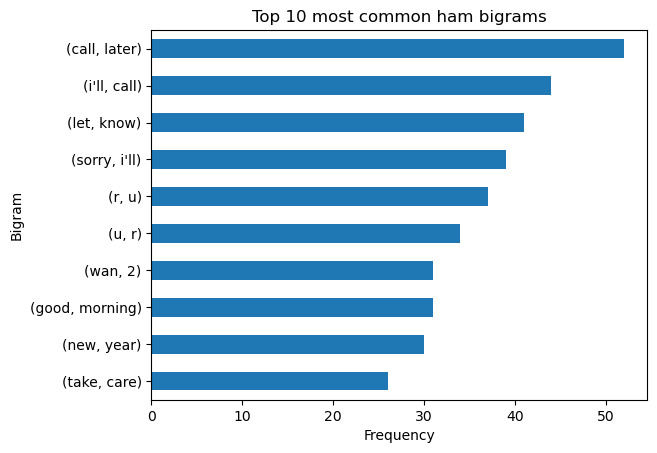

In [11]:
#visualize top ten
pd.Series(nltk.bigrams(ham_words)).value_counts().head(10).plot.barh().invert_yaxis()
plt.title('Top 10 most common ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

In [12]:
bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts().head(10)
bigrams

(call, later)      52
(i'll, call)       44
(let, know)        41
(sorry, i'll)      39
(r, u)             37
(u, r)             34
(wan, 2)           31
(good, morning)    31
(new, year)        30
(take, care)       26
dtype: int64

In [13]:
#wordcloud of ham words

<hr style="border:1px solid black">

### 1c. Is there any overlap in the bigrams for the spam data and the ham data?

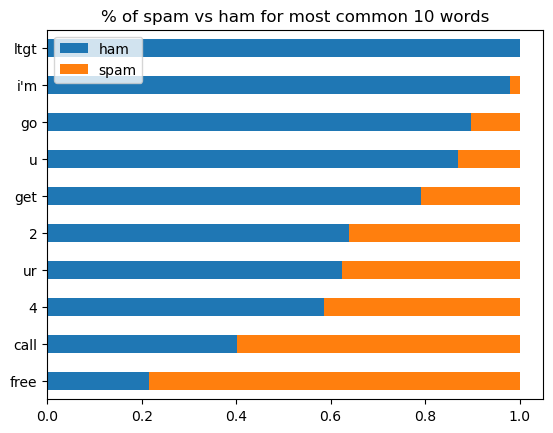

In [14]:
#visualize only ham and spam as percent of 'all'
(word_counts.sort_values(by='all', ascending=False)
 .head(10)
 .apply(lambda row: row/ row['all'],axis=1)
 .drop(columns='all')
 .sort_values(by='spam')
 .plot.barh(stacked=True)).invert_yaxis()
plt.title('% of spam vs ham for most common 10 words')
None

<hr style="border:1px solid black">

### 1d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [15]:
#put list of two word combos together
list(nltk.trigrams(ham_words))

[('go', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'bugis'),
 ('available', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'got'),
 ('cine', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'u'),
 ('wif', 'u', 'oni'),
 ('u', 'oni', 'u'),
 ('oni', 'u', 'dun'),
 ('u', 'dun', 'say'),
 ('dun', 'say', 'early'),
 ('say', 'early', 'hor'),
 ('early', 'hor', 'u'),
 ('hor', 'u', 'c'),
 ('u', 'c', 'already'),
 ('c', 'already', 'say'),
 ('already', 'say', 'nah'),
 ('say', 'nah', 'think'),
 ('nah', 'think', 'go'),
 ('think', 'go', 'usf'),
 ('go', 'usf', 'life'),
 ('usf', 'life', 'around'),
 ('life', 'around', 'though'),
 ('around', 'though', 'even'),
 ('though', 'even', 'brother'),
 (

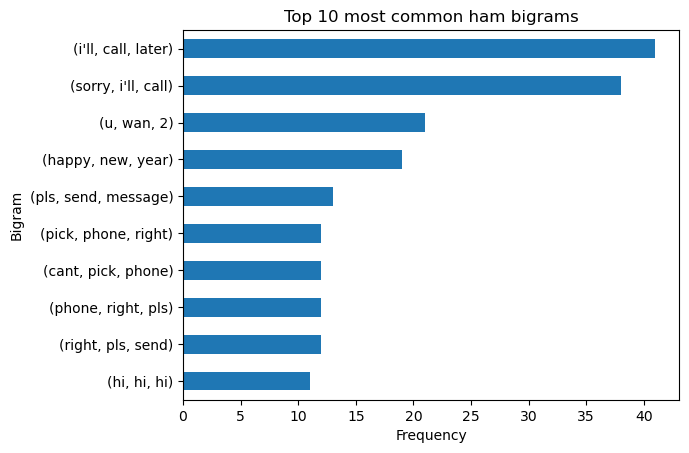

In [16]:
#visualize top ten
pd.Series(nltk.trigrams(ham_words)).value_counts().head(10).plot.barh().invert_yaxis()
plt.title('Top 10 most common ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

<hr style="border:1px solid black">
<hr style="border:1px solid black">

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [17]:
#acquire codeup articles
codeup_df = acquire.get_blog_articles_data()

codeup_df.head()

,title,content
0,Black Excellence in Tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...
1,Black excellence in tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...
2,Black excellence in tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...
3,Black excellence in tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...
4,Coding Bootcamp or Self-Learning? Which is Bes...,If you’re interested in embarking on a career ...


In [21]:
#applying clean function to get all normalized text in content column
article = clean(' '.join(codeup_df.content))
article

['black',
 'excellence',
 'tech',
 'panelist',
 'spotlight',
 'wilmarie',
 'de',
 'la',
 'cruz',
 'mejia',
 'codeup',
 'hosting',
 'black',
 'excellence',
 'tech',
 'panel',
 'honor',
 'black',
 'history',
 'month',
 'february',
 '22',
 '2023',
 'celebrate',
 'wed',
 'like',
 'spotlight',
 'panelist',
 'leading',
 'discussion',
 'learn',
 'bit',
 'respective',
 'experience',
 'black',
 'leader',
 'tech',
 'industry',
 'meet',
 'wilmarie',
 'wilmarie',
 'de',
 'la',
 'cruz',
 'mejia',
 'current',
 'codeup',
 'student',
 'path',
 'becoming',
 'fullstack',
 'web',
 'developer',
 'dallas',
 'tx',
 'campus',
 'wilmarie',
 'veteran',
 'expanding',
 'knowledge',
 'programming',
 'language',
 'technology',
 'journey',
 'codeup',
 'asked',
 'wilmarie',
 'share',
 'experience',
 'codeup',
 'share',
 'wa',
 'able',
 'meet',
 'people',
 'passionate',
 'coding',
 'positive',
 'learning',
 'environment',
 'hope',
 'join',
 'u',
 'february',
 '22nd',
 'sit',
 'insightful',
 'conversation',
 'wilmarie

In [19]:
#turn all words into a series
#get value count of all words
pd.Series(all_words).value_counts()

#removing stopwords would change this count

codeup        27
tech          18
black         17
coding        14
experience    13
              ..
interested     1
youre          1
tune           1
forget         1
ranking        1
Length: 517, dtype: int64

In [23]:
#assign to a variable
word_freq = pd.Series(article).value_counts()

In [24]:
#our top 5 words in the blogs are
word_freq.head()

codeup        27
tech          18
black         17
coding        14
experience    13
dtype: int64

Text(0, 0.5, 'Word')

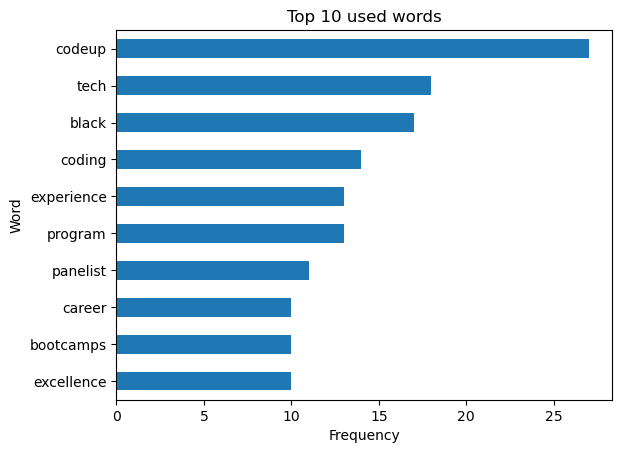

In [25]:
#visualize top 10
word_freq.head(10).plot.barh().invert_yaxis()

plt.title('Top 10 used words')
plt.xlabel('Frequency')
plt.ylabel('Word')

In [27]:
#put list of two word combos together
list(nltk.bigrams(article))

[('black', 'excellence'),
 ('excellence', 'tech'),
 ('tech', 'panelist'),
 ('panelist', 'spotlight'),
 ('spotlight', 'wilmarie'),
 ('wilmarie', 'de'),
 ('de', 'la'),
 ('la', 'cruz'),
 ('cruz', 'mejia'),
 ('mejia', 'codeup'),
 ('codeup', 'hosting'),
 ('hosting', 'black'),
 ('black', 'excellence'),
 ('excellence', 'tech'),
 ('tech', 'panel'),
 ('panel', 'honor'),
 ('honor', 'black'),
 ('black', 'history'),
 ('history', 'month'),
 ('month', 'february'),
 ('february', '22'),
 ('22', '2023'),
 ('2023', 'celebrate'),
 ('celebrate', 'wed'),
 ('wed', 'like'),
 ('like', 'spotlight'),
 ('spotlight', 'panelist'),
 ('panelist', 'leading'),
 ('leading', 'discussion'),
 ('discussion', 'learn'),
 ('learn', 'bit'),
 ('bit', 'respective'),
 ('respective', 'experience'),
 ('experience', 'black'),
 ('black', 'leader'),
 ('leader', 'tech'),
 ('tech', 'industry'),
 ('industry', 'meet'),
 ('meet', 'wilmarie'),
 ('wilmarie', 'wilmarie'),
 ('wilmarie', 'de'),
 ('de', 'la'),
 ('la', 'cruz'),
 ('cruz', 'mejia')

In [28]:
#see most common bigrams 
pd.Series(nltk.bigrams(article)).value_counts()

(black, excellence)        9
(coding, bootcamps)        9
(excellence, tech)         9
(course, report)           5
(tech, industry)           5
                          ..
(support, advocacy)        1
(advocacy, inclusivity)    1
(inclusivity, growth)      1
(growth, resource)         1
(year, ranking)            1
Length: 835, dtype: int64

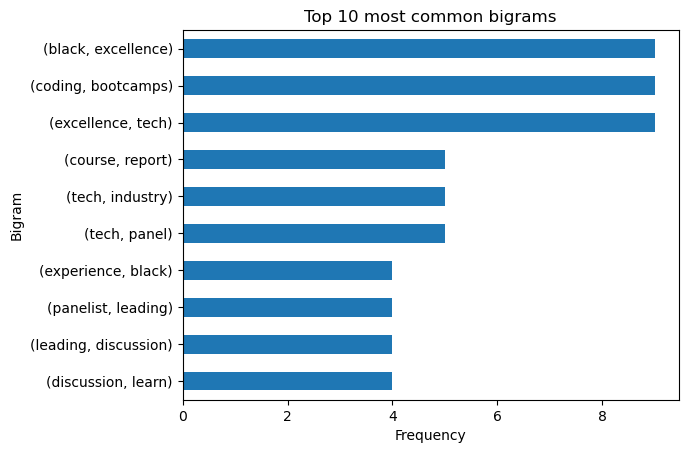

In [29]:
#visualize top ten
pd.Series(nltk.bigrams(article)).value_counts().head(10).plot.barh().invert_yaxis()
plt.title('Top 10 most common bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

<hr style="border:1px solid black">
<hr style="border:1px solid black">

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [32]:
news= acquire.get_news_articles_data()

In [34]:
news.head()

,title,content,category
0,Women to get free entry to matches in inaugura...,Women and girls will be getting free entry to ...,national
1,Harassed for independent thinking: INC on CPR'...,Senior Congress leader Jairam Ramesh said Cent...,national
2,2024 polls are about who should be defeated: T...,"Tamil Nadu CM MK Stalin, speaking at his birth...",national
3,Let's win polls first: Farooq to Kharge on Opp...,National Conference patron Farooq Abdullah on ...,national
4,UK's legal process independent of govt: UK min...,British Foreign Secretary James Cleverly on We...,national


In [35]:
#applying clean function to get all normalized text in content column
all_words = clean(' '.join(news.content))
all_words

['woman',
 'girl',
 'getting',
 'free',
 'entry',
 'match',
 'inaugural',
 'season',
 "women's",
 'premier',
 'league',
 'wpl',
 'begin',
 'march',
 '4',
 'meanwhile',
 'men',
 'boy',
 'ticket',
 'sold',
 'price',
 '100',
 '400',
 'tournament',
 'held',
 "mumbai's",
 'brabourne',
 'stadium',
 'navi',
 "mumbai's",
 'dr',
 'dy',
 'patil',
 'sport',
 'academy',
 'senior',
 'congress',
 'leader',
 'jairam',
 'ramesh',
 'said',
 'centre',
 'suspending',
 'centre',
 'policy',
 "research's",
 'licence',
 'foreign',
 'contribution',
 'regulation',
 'act',
 'harassment',
 'due',
 'think',
 "tank's",
 'independent',
 'thinking',
 'pm',
 'narendra',
 'modi',
 'want',
 'drumbeater',
 'toleratequestioning',
 'policy',
 'however',
 'professional',
 'ramesh',
 'said',
 'income',
 'tax',
 'department',
 'conducted',
 'survey',
 "cpr's",
 'premise',
 'five',
 'month',
 'ago',
 'tamil',
 'nadu',
 'cm',
 'mk',
 'stalin',
 'speaking',
 'birthday',
 'meet',
 'wednesday',
 'said',
 '2024',
 'general',
 'ele

In [37]:
#turn all words into a series
#get value count of all words
pd.Series(all_words).value_counts()

#removing stopwords would change this count

said         288
added        132
ha           120
wednesday     84
one           60
            ... 
illicit       12
funnelled     12
according     12
mansion       12
24            12
Length: 676, dtype: int64

In [39]:
news_df = all_words
news_df

['woman',
 'girl',
 'getting',
 'free',
 'entry',
 'match',
 'inaugural',
 'season',
 "women's",
 'premier',
 'league',
 'wpl',
 'begin',
 'march',
 '4',
 'meanwhile',
 'men',
 'boy',
 'ticket',
 'sold',
 'price',
 '100',
 '400',
 'tournament',
 'held',
 "mumbai's",
 'brabourne',
 'stadium',
 'navi',
 "mumbai's",
 'dr',
 'dy',
 'patil',
 'sport',
 'academy',
 'senior',
 'congress',
 'leader',
 'jairam',
 'ramesh',
 'said',
 'centre',
 'suspending',
 'centre',
 'policy',
 "research's",
 'licence',
 'foreign',
 'contribution',
 'regulation',
 'act',
 'harassment',
 'due',
 'think',
 "tank's",
 'independent',
 'thinking',
 'pm',
 'narendra',
 'modi',
 'want',
 'drumbeater',
 'toleratequestioning',
 'policy',
 'however',
 'professional',
 'ramesh',
 'said',
 'income',
 'tax',
 'department',
 'conducted',
 'survey',
 "cpr's",
 'premise',
 'five',
 'month',
 'ago',
 'tamil',
 'nadu',
 'cm',
 'mk',
 'stalin',
 'speaking',
 'birthday',
 'meet',
 'wednesday',
 'said',
 '2024',
 'general',
 'ele

In [41]:
#assign to a variable
news_freq = pd.Series(news_df).value_counts()
news_freq.head()

said         288
added        132
ha           120
wednesday     84
one           60
dtype: int64

Text(0, 0.5, 'Word')

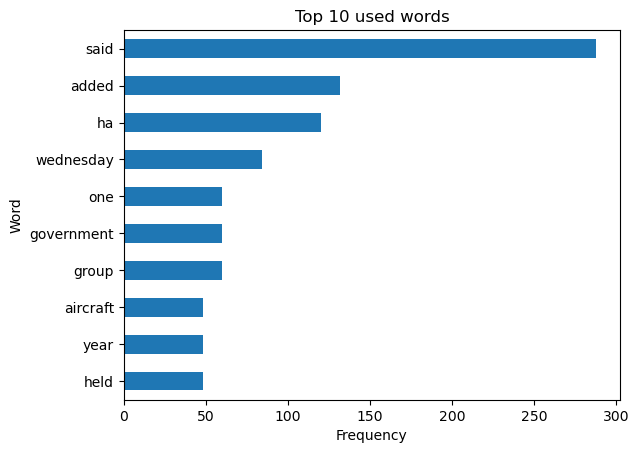

In [42]:
#visualize top 10
news_freq.head(10).plot.barh().invert_yaxis()

plt.title('Top 10 used words')
plt.xlabel('Frequency')
plt.ylabel('Word')

In [43]:
#put list of two word combos together
list(nltk.bigrams(news_df))

[('woman', 'girl'),
 ('girl', 'getting'),
 ('getting', 'free'),
 ('free', 'entry'),
 ('entry', 'match'),
 ('match', 'inaugural'),
 ('inaugural', 'season'),
 ('season', "women's"),
 ("women's", 'premier'),
 ('premier', 'league'),
 ('league', 'wpl'),
 ('wpl', 'begin'),
 ('begin', 'march'),
 ('march', '4'),
 ('4', 'meanwhile'),
 ('meanwhile', 'men'),
 ('men', 'boy'),
 ('boy', 'ticket'),
 ('ticket', 'sold'),
 ('sold', 'price'),
 ('price', '100'),
 ('100', '400'),
 ('400', 'tournament'),
 ('tournament', 'held'),
 ('held', "mumbai's"),
 ("mumbai's", 'brabourne'),
 ('brabourne', 'stadium'),
 ('stadium', 'navi'),
 ('navi', "mumbai's"),
 ("mumbai's", 'dr'),
 ('dr', 'dy'),
 ('dy', 'patil'),
 ('patil', 'sport'),
 ('sport', 'academy'),
 ('academy', 'senior'),
 ('senior', 'congress'),
 ('congress', 'leader'),
 ('leader', 'jairam'),
 ('jairam', 'ramesh'),
 ('ramesh', 'said'),
 ('said', 'centre'),
 ('centre', 'suspending'),
 ('suspending', 'centre'),
 ('centre', 'policy'),
 ('policy', "research's"),


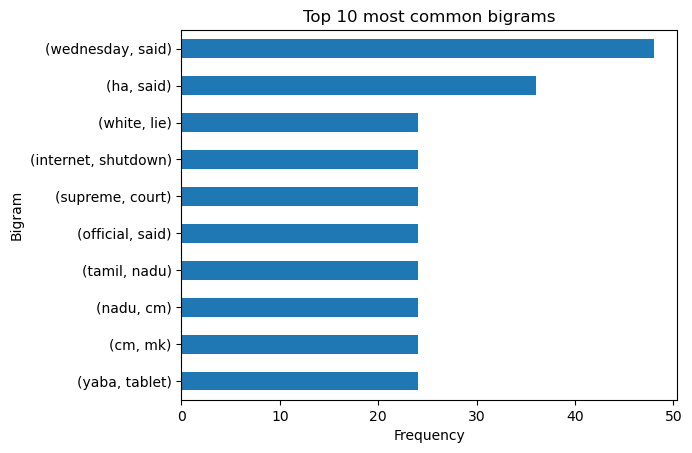

In [44]:
#visualize top ten
pd.Series(nltk.bigrams(news_df)).value_counts().head(10).plot.barh().invert_yaxis()
plt.title('Top 10 most common bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None